**The dataset**
$$(X,Y)$$
 $m$ is the number of training examples in the dataset

**The model**
$$F(X)=Xθ$$
$$θ = (w,b)^T$$
Don't forget to add a vector of ones to X

**The cost function**
$$J(θ)=\frac{1}{2m}\sum\limits_{i = 1}^{m} (Xθ-Y)^{2}$$

**Gradient**
$$∇J(θ)=\frac{1}{m}X^T(Xθ-Y)$$

**Gradient descent**
$$θ ← θ-α∇J(θ)$$

We will fit the linear regression parameters  (w,b)  to our dataset.

**Import packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Dataset**

In [2]:
# generate a random dataset
np.random.seed(0)
X = np.random.rand(100, 1)
Y = 2 + 3 * X + np.random.rand(100, 1)
# initialize the model parameters
T = np.random.randn(2, 1)

**Model**

In [3]:
def model(X, T):
  X = np.c_[X, np.ones(len(X))]
  return np.dot(X,T)

**The cost function**

In [4]:
def cost_function(X, Y, T):
  return 1/(2*len(Y))*np.sum(model(X,T)-Y)**2

**The gradient**

In [5]:
def compute_gradient(X, Y, T):
  return 1/len(Y)*np.dot(np.transpose(X), model(X,T)-Y)

**The gradient descent**

In [6]:
def gradient_descent(X, Y, T, learning_rate, num_iterations):
  history = np.zeros(num_iterations)
  for i in range(num_iterations):
    T = T - learning_rate * compute_gradient(X,Y,T)
    history = cost_function(X,Y,T)
  return T , history

**The plot function**

In [7]:
def plot(X, Y, T):
  plt.scatter(X, Y)
  plt.plot(X, model(X, T), color='r')
  plt.xlabel('X')
  plt.ylabel('y')
  plt.show()

**Application**

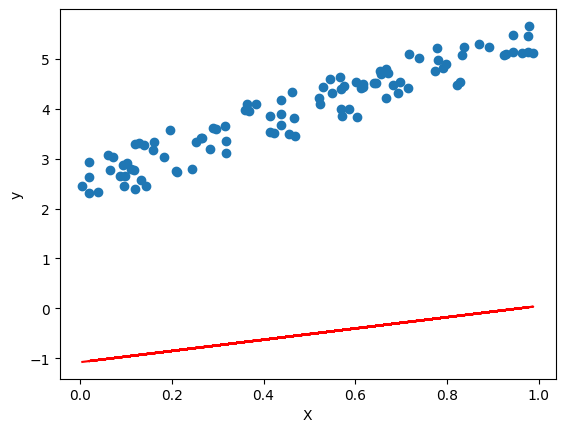

In [8]:
# Plot before applying the learning algorithm
plot(X, Y, T)

In [9]:
# Define the hyperparameters
learning_rate = 0.1
num_iterations = 1000
# Apply the descent gradient algorithm
T,history = gradient_descent(X, Y, T, learning_rate, num_iterations)

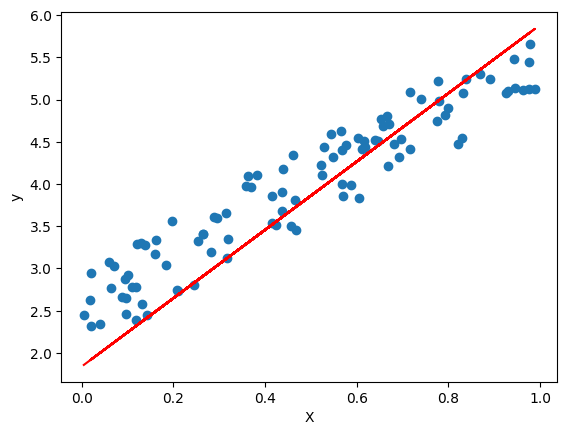

In [10]:
# Plot after applying the learning algorithm
plot(X,Y,T)

In [11]:
#evaluate the performance of the model using RMSE and R-square metrics
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(model(X,T), Y))
print("RMSE :", rmse)
r = r2_score(Y,model(X,T))
print("R2 :", r)

RMSE : 0.4652301652785166
R2 : 0.7270580208528021
